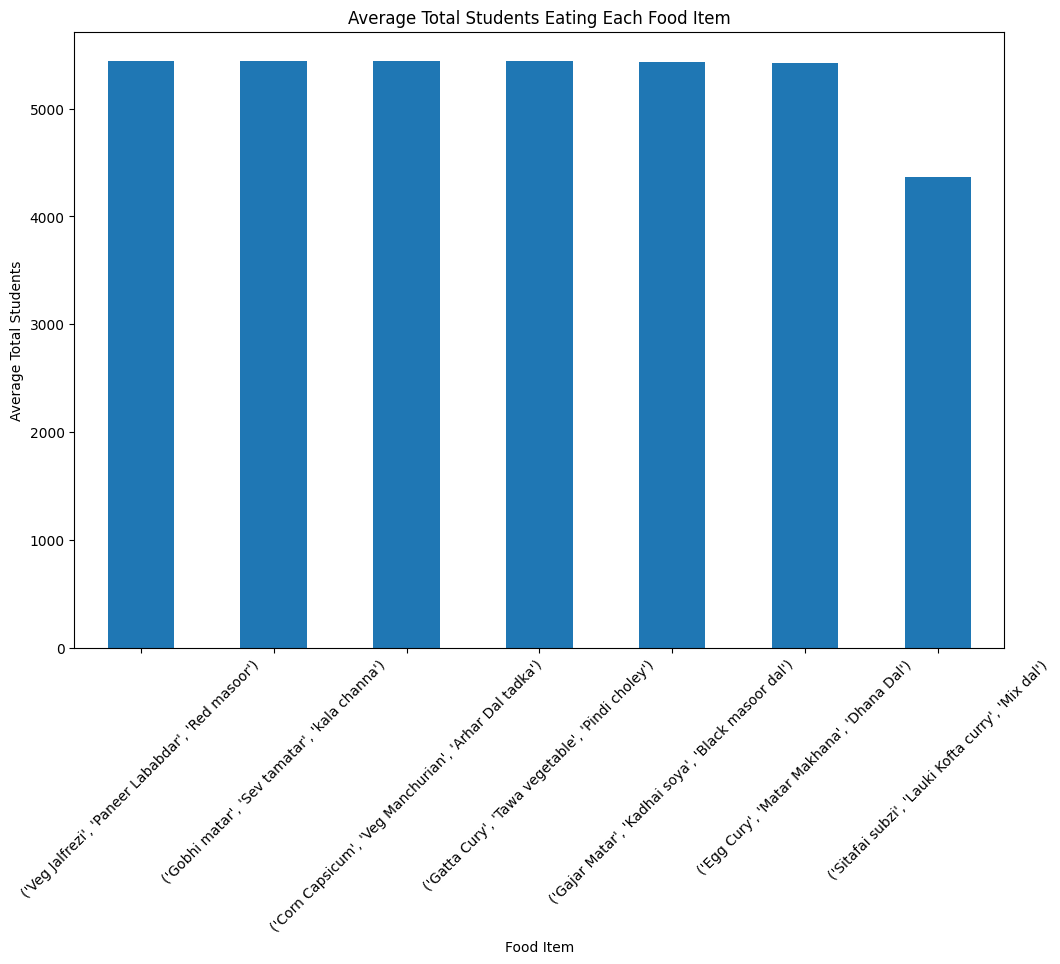

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Dinner_data.csv')

avg_students_per_food = df.groupby('Dinner')['Total Students'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_students_per_food.plot(kind='bar')
plt.title('Average Total Students Eating Each Food Item')
plt.xlabel('Food Item')
plt.ylabel('Average Total Students')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Dinnre_Event_Dataset.csv')

avg_students_by_event = df.groupby('Event')['Total Students'].mean()

plt.figure(figsize=(8, 6))
avg_students_by_event.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Students with and without Events')
plt.xlabel('Event')
plt.ylabel('Average Number of Students')
plt.xticks([0, 1], ['No Event', 'Event'], rotation=0)
plt.grid(axis='y')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Dinnre_Event_Dataset.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Dinner_data.csv')

df['Date'] = pd.to_datetime(df['Date'])

avg_total_students = df.groupby('Date')['Total Students'].mean().reset_index()
phase_counts = df.groupby(['Date', 'Dinner'])[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']].sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(avg_total_students['Date'], avg_total_students['Total Students'], label='Average Total Students', color='blue')
plt.title('Trend of Average Total Students in Dinner')
plt.xlabel('Date')
plt.ylabel('Average Total Students')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import   r2_score

df = pd.read_csv('Dinner_data.csv')

features = pd.get_dummies(df['Dinner'])

X = features
y = df[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

food_items = features.columns
predictions = {}

for food_item in food_items:
    new_menu_items = pd.DataFrame({'Dinner': [food_item]})
    new_features = pd.get_dummies(new_menu_items['Dinner'], columns=features.columns)

    missing_cols = set(features.columns) - set(new_features.columns)
    for col in missing_cols:
        new_features[col] = 0


    new_features = new_features[features.columns]


    prediction = model.predict(new_features)[0]
    predictions[food_item] = prediction


for food_item, prediction in predictions.items():
    print(f'{food_item}: {prediction}')


R^2 Score: -0.02825002243813196
('Corn Capsicum', 'Veg Manchurian', 'Arhar Dal tadka'): [ 552.  1887.5 1700.  1291. ]
('Egg Cury', 'Matar Makhana', 'Dhana Dal'): [ 579.  1896.  1693.5 1277. ]
('Gajar Matar', 'Kadhai soya', 'Black masoor dal'): [ 543.  1876.  1717.5 1300. ]
('Gatta Cury', 'Tawa vegetable', 'Pindi choley'): [ 573.  1891.  1675.5 1292. ]
('Gobhi matar', 'Sev tamatar', 'kala channa'): [ 508. 1903. 1727. 1301.]
('Sitafai subzi', 'Lauki Kofta curry', 'Mix dal'): [ 565.  1918.  1680.5 1291. ]
('Veg Jalfrezi', 'Paneer Lababdar', 'Red masoor'): [ 573.   1900.   1689.75 1285.  ]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score

df = pd.read_csv('Dinner_data.csv')

features = pd.get_dummies(df['Dinner'])

X = features
y = df[['Plates in Phase 1', 'Plates in Phase 2', 'Plates in Phase 3', 'Plates in Phase 4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred) + 1

print('R^2 Score:', r2)

food_items = features.columns
predictions = {}

for food_item in food_items:
    new_menu_items = pd.DataFrame({'Dinner': [food_item]})
    new_features = pd.get_dummies(new_menu_items['Dinner'], columns=features.columns)

    missing_cols = set(features.columns) - set(new_features.columns)
    for col in missing_cols:
        new_features[col] = 0

    new_features = new_features[features.columns]

    prediction = model.predict(new_features)[0]
    predictions[food_item] = prediction

for food_item, prediction in predictions.items():
    print(f'{food_item}: {prediction}')


R^2 Score: 0.9717510259929647
('Corn Capsicum', 'Veg Manchurian', 'Arhar Dal tadka'): [ 559.05555556 1890.25925926 1698.72222222 1284.18518519]
('Egg Cury', 'Matar Makhana', 'Dhana Dal'): [ 573.04761905 1892.47619048 1695.54761905 1284.04761905]
('Gajar Matar', 'Kadhai soya', 'Black masoor dal'): [ 546.51428571 1877.6        1716.82857143 1296.17142857]
('Gatta Cury', 'Tawa vegetable', 'Pindi choley'): [ 576.31111111 1891.75555556 1675.24444444 1289.62222222]
('Gobhi matar', 'Sev tamatar', 'kala channa'): [ 507.45  1902.875 1727.25  1301.65 ]
('Sitafai subzi', 'Lauki Kofta curry', 'Mix dal'): [ 564.82352941 1917.73529412 1680.91176471 1291.23529412]
('Veg Jalfrezi', 'Paneer Lababdar', 'Red masoor'): [ 566.52380952 1897.45238095 1691.54761905 1290.33333333]
